# Different Chess AI Algorithm

This markdown showcases different type of function associate with different algorithms. I used the python-chess module to solve the chess game situation. The chess game has no GUI to play but can be access using push_uci function call. .For minimax, I follow an implementation of minimax from [Sebastian Lague](https://www.youtube.com/watch?v=l-hh51ncgDI). Its a great guide to visualising Minimax function. I implemented that minimax algorithm with the python-chess library to create a working AI. 

1. Minimax w/o Pruning
1. Minimax w/ Pruning
1. Machine Learning w/ Data

In [1]:
import chess

In [2]:
board = chess.Board()
piece_cost = {
    'p' : -10,
    'n' : -30,
    'b' : -30,
    'r' : -50,
    'q' : -90,
    'k' : -900,
    'P' : 10,
    'N' : 30, 
    'B' : 30,
    'R' : 50, 
    'Q' : 90,
    'K' : 900,
    '.' : 0,
    'None': 0
}

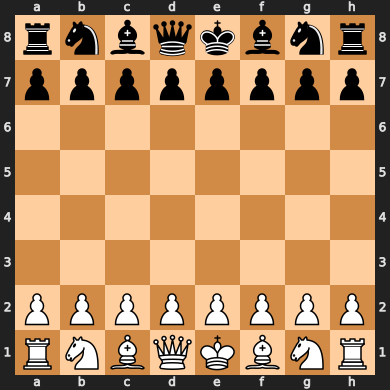

In [3]:
board.legal_moves
board

# Minimax Algorithn w/o Pruning

In [4]:
def minimax(position,depth,maximizingPlayer):
    if depth == 0 or position.is_game_over():
        eval = 0
        for i in range(0,64):
            eval += piece_cost[str(position.piece_at(i))]
        return eval,position.move_stack
    if maximizingPlayer:
        maxEval = -10000
        for child_move in position.legal_moves:
            child = position.copy()
            child.push_uci(str(child_move))
            eval,ms = minimax(child,depth-1,False)
            #maxEval = max(maxEval,eval)
            if eval > maxEval:
                move_stack = ms 
                maxEval = eval
        return maxEval,move_stack
    else:
        minEval = 10000
        for child_move in position.legal_moves:
            child = position.copy()
            child.push_uci(str(child_move))
            eval,ms = minimax(child,depth-1,True)
            #minEval = min(minEval,eval)
            if eval < minEval:
                move_stack = ms 
                minEval = eval
        return minEval,move_stack


# Minimax Algrotihm w/ Pruning

In [5]:
def minimax(position,depth,alpha,beta,maximizingPlayer):
    if depth == 0 or position.is_game_over():
        eval = 0
        for i in range(0,64):
            eval += piece_cost[str(position.piece_at(i))]
        return eval,position.move_stack
    if maximizingPlayer:
        maxEval = -10000
        for child_move in position.legal_moves:
            child = position.copy()
            child.push_uci(str(child_move))
            eval,ms = minimax(child,depth-1,alpha,beta,False)
            #maxEval = max(maxEval,eval)
            if eval > maxEval:
                move_stack = ms 
                maxEval = eval
            alpha = max(alpha,eval)
            if beta <= alpha:
                break
        return maxEval,move_stack
    else:
        minEval = 10000
        for child_move in position.legal_moves:
            child = position.copy()
            child.push_uci(str(child_move))
            eval,ms = minimax(child,depth-1,alpha,beta,True)
            #minEval = min(minEval,eval)
            if eval < minEval:
                move_stack = ms 
                minEval = eval
            beta = min(beta,eval)
            if beta <= alpha:
                break
        return minEval,move_stack

In [6]:
print(minimax(board,5,-10000,10000,True))

(10, [Move.from_uci('g2g3'), Move.from_uci('g8h6'), Move.from_uci('f1h3'), Move.from_uci('h8g8'), Move.from_uci('h3d7')])


# Machine Learning (Neural Network / Deep Learning)
The data use correspond to blitz games with player rating above 2000 in April 2020 (latest month to have data from FICs database). The data format is in PGN format. [Link to DB](https://www.ficsgames.org/download.html)

In [7]:
import chess.pgn 
pgn = open("data/ficsgamesdb.pgn", encoding="utf-8-sig")
games = []
total_games_read = 100
while True:
    game = chess.pgn.read_game(pgn)
    if game == None or total_games == 0:
        break 
    games.append(str(game.mainline_moves()))
    total_games_read -= 1
for game in games:
    print(game)



1. c4 c6 2. g3 d5 3. Bg2 Nf6 4. cxd5 cxd5 5. d4 Nc6 6. Nf3 Bg4 7. O-O Qb6 8. e3 e6 9. Nc3 Bb4 10. h3 Bxf3 11. Bxf3 O-O 12. Bd2 Na5 13. Na4 Qd6 14. Nc5 Bxd2 15. Qxd2 b6 16. Nd3 Nc4 17. Qe2 Ne4 18. Bg2 Rfc8 19. Rac1 Rc7 20. b3 Na5 21. Rxc7 Qxc7 22. Rc1 Qb7 23. Qc2 f6 24. Nf4 Re8 25. Qc7 Re7 26. Qd8+ Kf7 27. Rc8 { Black resigns }
1. e4 c5 2. d4 cxd4 3. Qxd4 d6 4. Qa4+ Bd7 5. Bb5 a6 6. Bxd7+ Nxd7 7. Nf3 Nf6 8. Nc3 e6 9. Bg5 Be7 10. e5 b5 11. Qd4 Nxe5 12. Nxe5 dxe5 13. Qxe5 b4 14. Rd1 Qb8 15. Qxb8+ Rxb8 16. Bxf6 Bxf6 17. Na4 Ke7 18. O-O Rhd8 19. Nc5 a5 20. b3 Rxd1 21. Rxd1 Rc8 22. Rd7+ Ke8 23. a3 bxa3 24. Ra7 Rxc5 25. c4 { White resigns }
1. d4 Nf6 2. Nc3 d5 3. Bf4 c6 4. e3 g6 5. Nf3 Bg7 6. Be2 O-O 7. Ne5 Nfd7 8. h4 h6 9. e4 Nxe5 10. Bxe5 f6 11. Bg3 e6 12. h5 g5 13. Qd2 b5 14. exd5 exd5 15. O-O f5 16. Bxb8 Rxb8 17. f4 g4 18. Nd1 g3 19. Re1 Qh4 20. Bf3 Bd7 21. Ne3 Rbe8 22. Nf1 Re4 23. Bxe4 fxe4 24. Qe3 Rxf4 25. Nxg3 Rf3 26. gxf3 Qxg3+ 27. Kh1 exf3 28. Qd2 Bh3 29. Qh2 Bg2+ 30. Kg1 Bxd4+ 31. R

In [8]:
len(games)

100